## Practica.

Realizar la planificación y modelado de una simulacion basado en eventos discretos para identificar los contagios dentro de un establecimiento de estudiantes post COVID-19 para el reingreso de clases. Los pasos para el regreso progresivo a clases se describe a continuación:

            ▪ Calcular e Identificar el aforo máximo permitido en la institución educativa.
            ▪ Identificar el número de estudiantes y el porcentaje de contagio dentro del contexto poblacional el mismo que se aplicara dentro de la simulación por el contagio.
            ▪ Generar la simulación desde la puerta de ingreso y la salida del plantel por día.
            ▪ Los estudiantes hacen fila para ingresar al establecimiento y no pueden superar el aforo permitido.
            ▪ Realizar con un tiempo de un 1 mes.
         
Generar graficas que indiquen los estudiantes que presentaron complicaciones y el total de estudiantes por establecimiento en cada día o semana.

**Nota**: No tomar datos de transporte, numero de aulas, personal docente, etc. Solo se el ingreso, salida y el contagio dentro del establecimiento.


In [2]:
pip install simpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


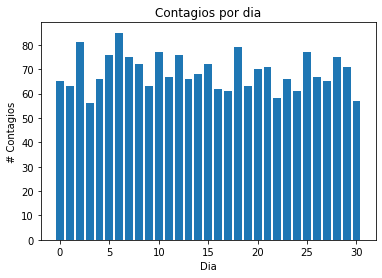

In [4]:
import simpy
import random
import matplotlib.pyplot as plt
from scipy import stats 


contagio_tasa=0.05
cap_max_aforo=300
tiempo_horas = 360 * 38 #horas de estudio * dias del mes
cont_estadia=0
cont_dias=0
contagiosxdia={}

class Establecimiento_Universidad(object):
    
    def __init__(self, environment, cap_max_aforo):
        self.env=environment
        self.cap_max_aforo = simpy.Resource(environment, cap_max_aforo)

        
    def clases_presenciales(self):
        yield self.env.timeout(360) #tiempo en horas(6)
    

def llegada_estudiantes(env, Establecimiento_Universidad, contagio_tasa , cont_dias):

    with Establecimiento_Universidad.cap_max_aforo.request() as cap_max_aforo:

        yield cap_max_aforo
        cont = 0
        yield env.process(Establecimiento_Universidad.clases_presenciales())

        if cont_estadia<=0 & cont_estadia<60:

            bernoulli = stats.bernoulli(contagio_tasa)
            cont=bernoulli.rvs(1)

        elif cont_estadia<=60 & cont_estadia<120:

            contagio_tasa=+0.1
            bernoulli = stats.bernoulli(contagio_tasa)
            cont=bernoulli.rvs(1)


        elif cont_estadia>=120 & cont_estadia<180:
            
            contagio_tasa=+0.2
            bernoulli = stats.bernoulli(contagio_tasa)
            cont=bernoulli.rvs(1)

        elif cont_estadia>=180 & cont_estadia<240:

            contagio_tasa=+0.3
            bernoulli = stats.bernoulli(contagio_tasa)
            cont=bernoulli.rvs(1)

        elif cont_estadia>=240 & cont_estadia<300:

            contagio_tasa=+0.4
            bernoulli = stats.bernoulli(contagio_tasa)
            cont=bernoulli.rvs(1)

        elif cont_estadia>=300 & cont_estadia<360:

            contagio_tasa=+0.5
            bernoulli = stats.bernoulli(contagio_tasa)
            cont=bernoulli.rvs(1)


        if cont == 1 :
            if cont_dias in contagiosxdia.keys():
                contagiosxdia[cont_dias]+=1
            else:
                contagiosxdia[cont_dias]=1

def num_contagios_x_dia(horas, porcentaje):
    contadorContagios=0
    for i in list(horas.keys()):
        bernoulli = stats.bernoulli(porcentaje)
        contagios=bernoulli.rvs(horas[i])
        
        for j in contagios:
            if j == 1:
                contadorContagios+=1
    return contadorContagios

def ejecutar_simulacion(env, cap_max_aforo):
    
    universidad=Establecimiento_Universidad(env, cap_max_aforo)
    global contagiosxdia
    global cont_dias
    global cont_estadia
    
    while True:
        cont_estadia+=1
        yield env.timeout(1)
        env.process(llegada_estudiantes(env, universidad, contagio_tasa, cont_dias))
        
        if cont_estadia==360:
            cont_dias=cont_dias+1
            cont_estadia=0
        
     
env=simpy.Environment()
env.process(ejecutar_simulacion(env, cap_max_aforo))
env.run(until = tiempo_horas)

y =  list(contagiosxdia.keys())
x = list(contagiosxdia.values())
plt.bar(y, x)
plt.title("Contagios por dia")
plt.xlabel("Dia")
plt.ylabel("# Contagios")
plt.show()